In [1]:
from model import Dense, Rough
from losses.MeanSquaredError import MSE
from learning_rate_schedules.LearningRateScheduler import ExponentialDecayScheduler
from utils import sliding_window, plot_curve_fitting, plot_regression
from model import compile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
path = 'data\\ECG Datasets.xlsx'
x=pd.read_excel(path, header=None).to_numpy()[1:].astype('float32')

In [3]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
data = sliding_window(x, 12)
X = data[:, :4]
Y = data[:,[4, 11]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)
# Y_train, Y_test = Y_train.reshape((-1, 2)), Y_test.reshape((-1,2))

In [4]:
layer0 = Rough(input_size=4, output_size=5)
layer2 = Dense(input_size=5, output_size=2, activation='linear')
model = compile([layer0, layer2])
model.summary()


 ****************************** model summary ****************************** 

layer 1:
	<class 'layers.Rough.Rough_network.Rough'>
	activation function: sigmoid
	batch size: 32
	input size: 4
	output size: 5
	number of parameters: 55
	number of trainable parameters: 50
	number of non trainable parameters: 5
	--------------------------------------------------
layer 2:
	<class 'layers.Dense.Dense_network.Dense'>
	activation function: linear
	batch size: 32
	input size: 5
	output size: 2
	number of parameters: 12
	number of trainable parameters: 12
	number of non trainable parameters: 0
	--------------------------------------------------
total number of parameters: 67
	total number of trainable parameters: 62
	total number of non trainable parameters: 5
	

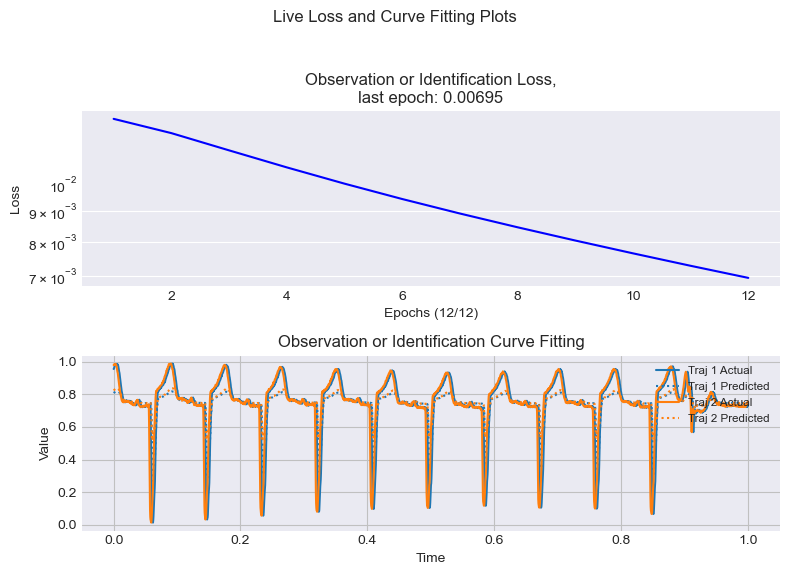

In [5]:
history = model.fit(X_train, Y_train, MSE(), epoch=12,
                    learning_rate=ExponentialDecayScheduler(lr_initial=0.5, decay_rate=0.6),
                    plot_fitting=True, batch_size=8)

Test MSE is 0.00840


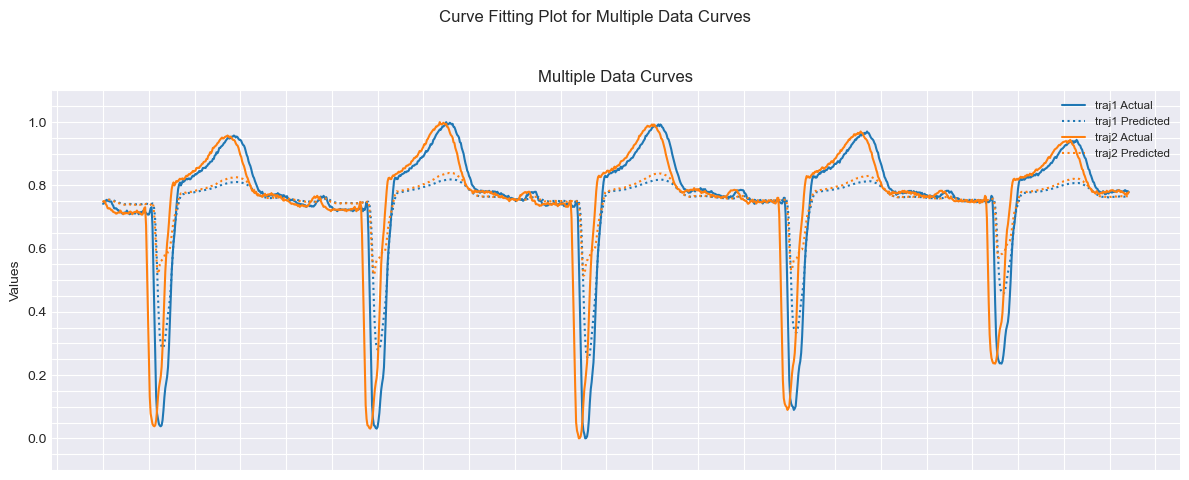

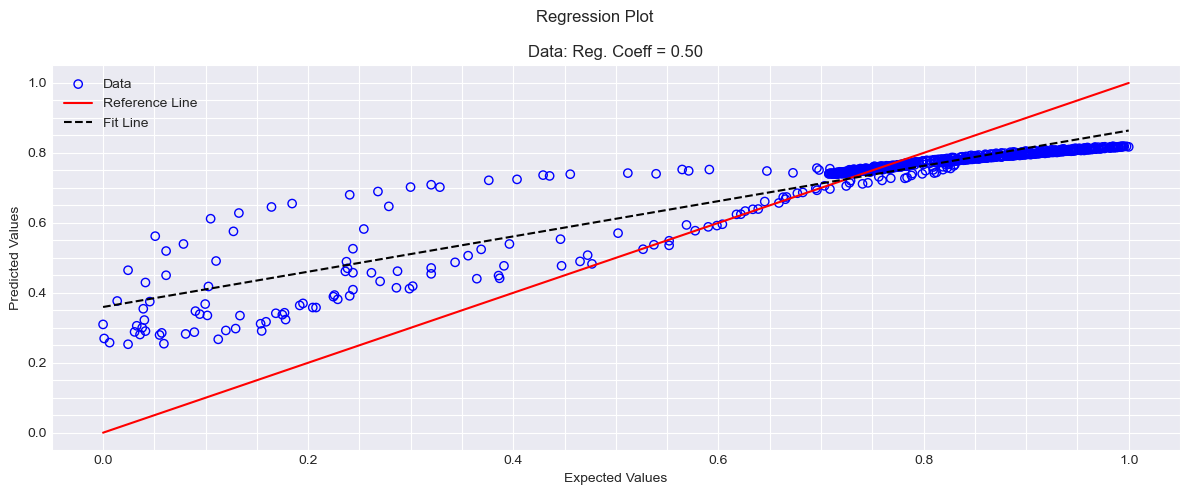

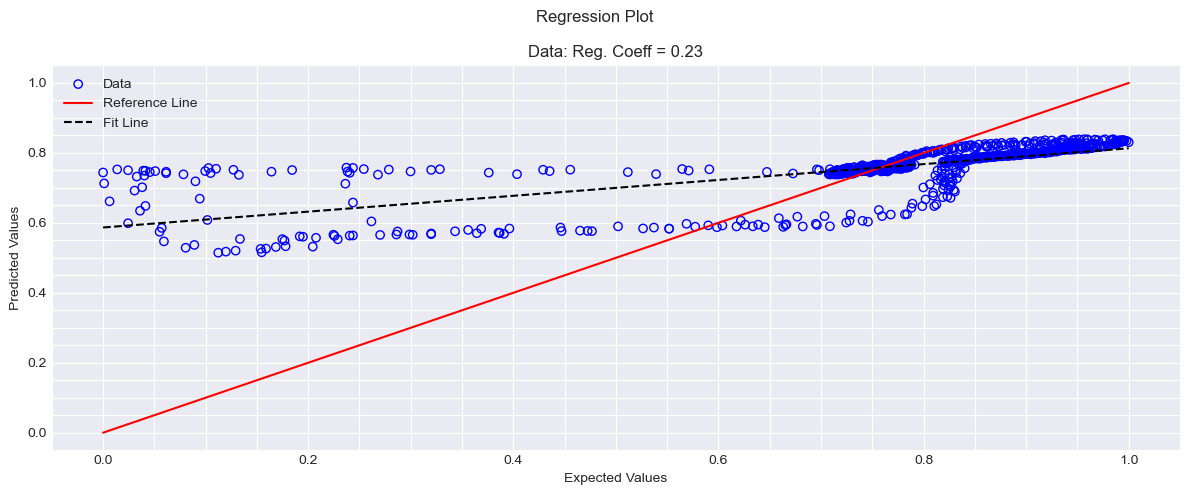

In [6]:
Y_test_predicted = model(X_test)
mse = MSE().forward(Y_test_predicted, Y_test)
print(f'Test MSE is {mse:.5f}')
plot_curve_fitting(Y_test.T, Y_test_predicted.T, ['traj1', 'traj2'])
plot_regression(Y_test[:,0], Y_test_predicted[:,0])
plot_regression(Y_test[:,1], Y_test_predicted[:,1])

In [10]:
layer0 = Dense(input_size=4, output_size=3)
layer2 = Dense(input_size=3, output_size=2, activation='linear')
model = compile([layer0, layer2])
model.summary()


 ****************************** model summary ****************************** 

layer 1:
	<class 'layers.Dense.Dense_network.Dense'>
	activation function: relu
	batch size: 32
	input size: 4
	output size: 3
	number of parameters: 15
	number of trainable parameters: 15
	number of non trainable parameters: 0
	--------------------------------------------------
layer 2:
	<class 'layers.Dense.Dense_network.Dense'>
	activation function: linear
	batch size: 32
	input size: 3
	output size: 2
	number of parameters: 8
	number of trainable parameters: 8
	number of non trainable parameters: 0
	--------------------------------------------------
total number of parameters: 23
	total number of trainable parameters: 23
	total number of non trainable parameters: 0
	

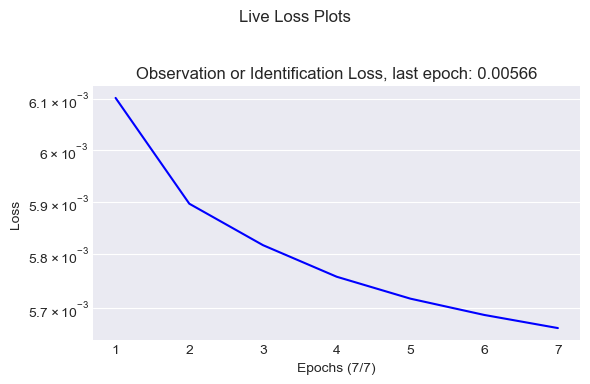

In [11]:
history = model.EKF(X_train, Y_train, MSE(), epoch=7, fig_size=(6,4))

Test MSE is 0.00685


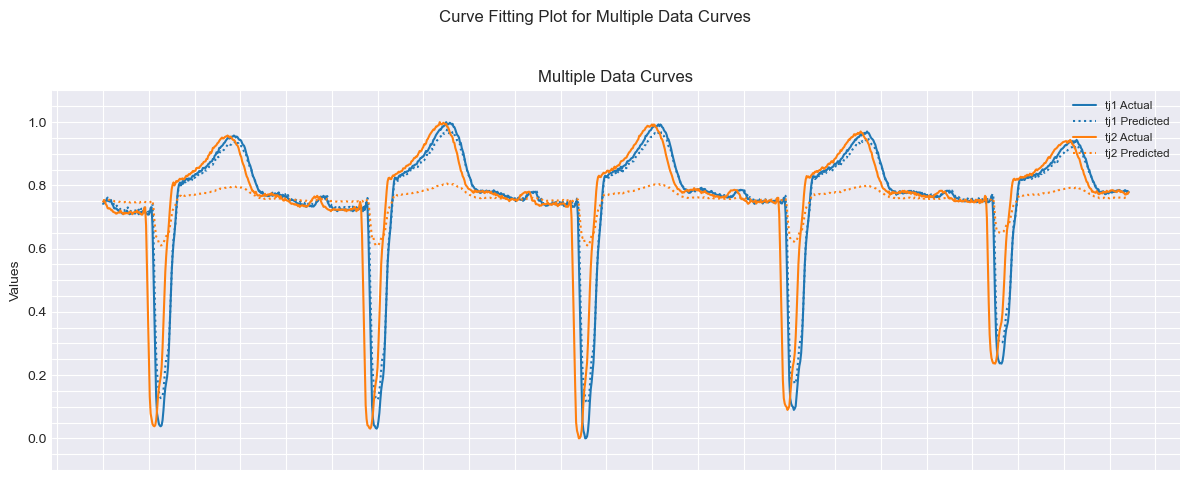

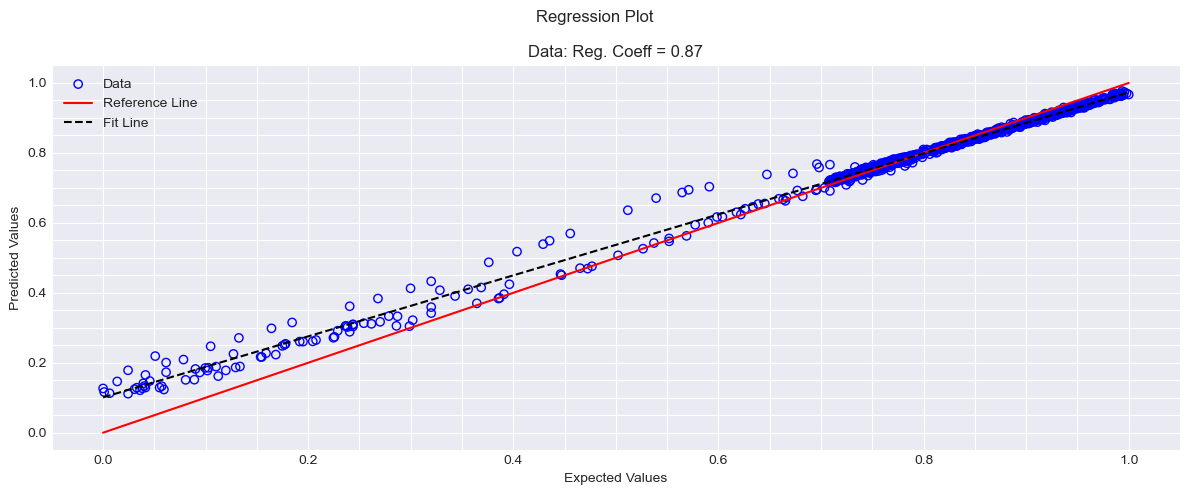

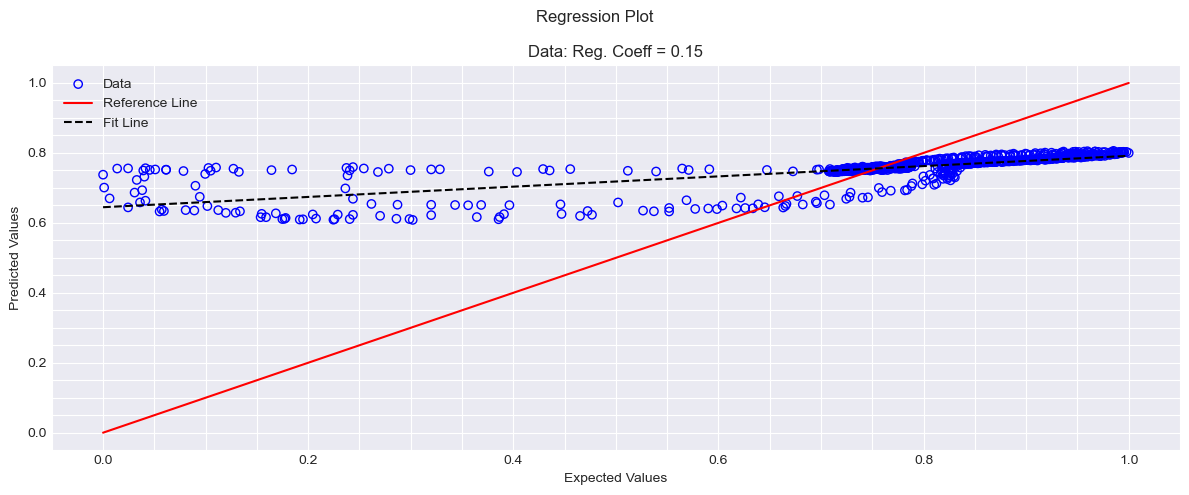

In [12]:
Y_test_predicted = model(X_test)
mse = MSE().forward(Y_test_predicted, Y_test)
print(f'Test MSE is {mse:.5f}')
plot_curve_fitting(Y_test.T, Y_test_predicted.T, curve_labels=['tj1', 'tj2'])
plot_regression(Y_test[:,0], Y_test_predicted[:,0])
plot_regression(Y_test[:,1], Y_test_predicted[:,1])